# Prototype Of Stock Sets

Author: Taylor D. Gabatino

Description: Prototype of Stock Sets to Be Used for the Big Data Analysis

This notebook will serve as a small analyzing of a set of stocks to determine whether this data is scalable. At a minimum, 5 - 10 stocks are selected, and will be prototyped in order to apply to a larger dataset. 

The stocks that are chosen for this particular prototype are the top 10 stocks across the years 2010-2020. 

In [25]:
# If you wish to install the modules needed, here are a list of the installations
#!pip install pandas
#!pip install pandas_datareader

# Import Statements
import pandas as pd
from pandas import DataFrame
from pandas_datareader import data as pdr
import yfinance as yf
import fix_yahoo_finance as fyf
import numpy as np
import scipy as sp
import csv

# For graphing purposes
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
%matplotlib inline

# For styling
import datetime as dt
import os

# Imports for collections
import collections
from collections import Counter

# Imports for Machine Learning
import sklearn
from sklearn.model_selection import train_test_split

print("Done importing")

Done importing


In [26]:
# Override for the errors that are produced with Yahoo Finance
yf.pdr_override()

# Stock Analysis

The important segment of understanding stock analysis is to run a regression on the years where no significant events may have caused any problems to arise. An example of this would be years where there may have been political fluctuations where there is a cause for the stock market to be affected. 

For the purposes of this study, the dates of 2000 - 2005 are analyzed, since no significant event on a sector of the stocks may have been affected. 

In [27]:
# Usage of the Stock Market Data
start = "2000-01-01" # First of the 5 year increment
end = "2005-01-01" # Second of the 5 year increment

# Selection of 5 stocks to run a base analysis on
aapl = pdr.get_data_yahoo('AAPL', start, end)
nvda = pdr.get_data_yahoo('NVDA', start, end)
msft = pdr.get_data_yahoo('MSFT', start, end)
amzn = pdr.get_data_yahoo('AMZN', start, end)
goog = pdr.get_data_yahoo('GOOGL', start, end)

# Print out and determine the given values
print(aapl)
print(nvda)
print(msft)
print(amzn)
print(goog)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.856887  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.784643  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.796125  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.727229  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.761677  460734400
...              ...       ...       ...       ...        ...        ...
2004-12-27  1.157143  1.163393  1.122857  1.127857   0.966985  55949040

## Dataset Variables

In this analysis of stocks, a total of 5 were picked from the year 2000-2005. The years that were chosen were picked during a time frame where no apparent changes in political or economic problems occurred. Technology stocks were also chosen, because the rise of the dot com era passed, meaning the data that is shown would be relatively low.

## Inspecting the Columns

Inspection of the columns yield a variety of attributes to stocks that are important for traders to understand when analyzing their stock portfolio. They are **Open**, **High**, **Low**, **Close**, **Adj Close**, and **Volume**. Each of these attributes yield value to how the stocks were shown to be traded over time. 

These variables are difficult to visualize in the form of a table, so plotting these variables against each other yield a pictoral result of the data.

In [ ]:
# In case I need to switch these over to .csv
#appl.to_csv('AAPL.csv')

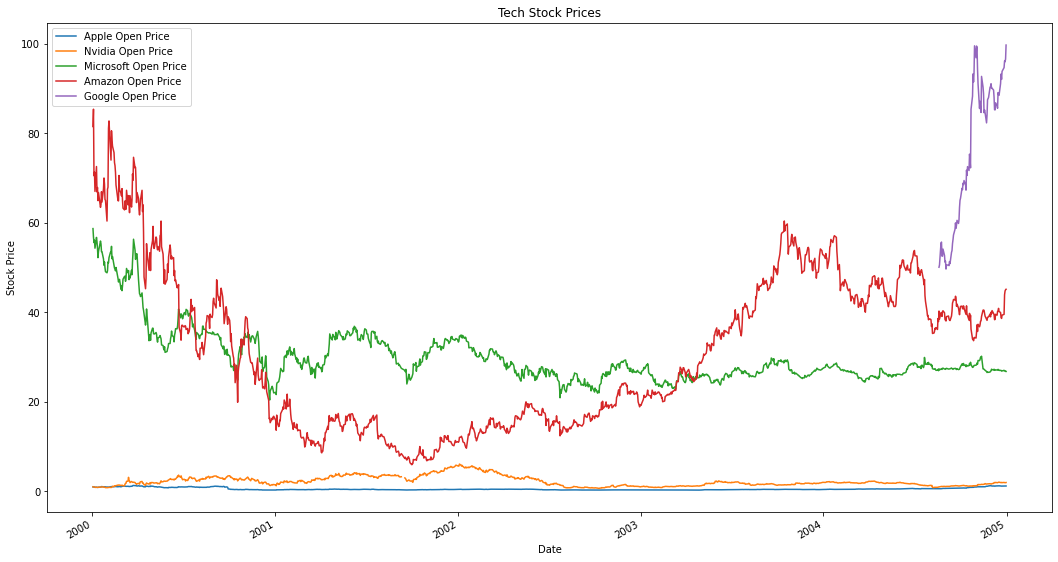

In [28]:
# Open Price Visualization
aapl['Open'].plot(label = "Apple Open Price", figsize=(18,10))
nvda['Open'].plot(label = "Nvidia Open Price", figsize=(18,10))
msft['Open'].plot(label = "Microsoft Open Price", figsize=(18,10))
amzn['Open'].plot(label = "Amazon Open Price", figsize=(18,10))
goog['Open'].plot(label = "Google Open Price", figsize=(18,10))
plt.legend()
plt.title('Tech Stock Prices')
plt.ylabel('Stock Price')
plt.show()

## Analyzing Open Prices

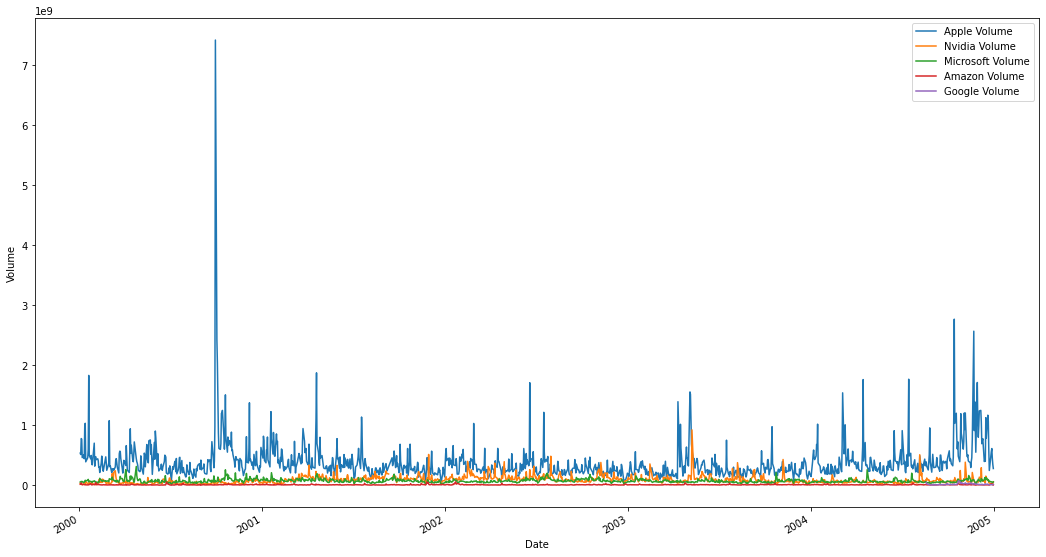

In [29]:
aapl['Volume'].plot(label = "Apple Volume",figsize=(18,10))
nvda['Volume'].plot(label="Nvidia Volume",figsize=(18,10))
msft['Volume'].plot(label="Microsoft Volume",figsize=(18,10))
amzn['Volume'].plot(label="Amazon Volume",figsize=(18,10))
goog['Volume'].plot(label="Google Volume",figsize=(18,10))
plt.ylabel('Volume')
plt.legend()
plt.show()

## Analyzing Volume

## Apple as An Example: Open vs. Volume

## GICS Sector and Market Analysis

The GICS sector in economics comes from an understanding that there is methodology for assigning companies and their value to the economic sector that is correlated to its operation of business. There are a total of 11 GICS sector, with their corresponding stocks being a sub-division of each.

The sector definitions are as follows:

* Energy
* Materials
* Industrials
* Consumer Discretionary
* Consumer Staples
* Health Care
* Financials
* Information Technology
* Real Estate
* Communication Services
* Utilities Sector

## Stock Analysis of Volatility

In [19]:
'''
This is dedicated to the NASDAQ CSV's and their respective downloads.
Change the path name to be the variable set to where these files are downloaded.
'''
# All stocks
nasdaq_stocks = pd.read_csv('/Users/taylor/ICS-438/big-data-stock-analysis/data/nasdaq_all.csv')
# Energy
energy_nasdaq = pd.read_csv('/Users/taylor/ICS-438/big-data-stock-analysis/data/nasdaq_energy.csv')
# Capital Goods
capital_nasdaq = pd.read_csv('/Users/taylor/ICS-438/big-data-stock-analysis/data/nasdaq_capitalgoods.csv')
    
# Industrials
# Consumer Discretionary
cons_nasdaq = pd.read_csv('/Users/taylor/ICS-438/big-data-stock-analysis/data/nasdaq_consumerservices.csv')
# Consumer Staples
# Health Care
health_nasdaq = pd.read_csv('/Users/taylor/ICS-438/big-data-stock-analysis/data/nasdaq_healthcare.csv')
# Financials
finance_nasdaq = pd.read_csv('/Users/taylor/ICS-438/big-data-stock-analysis/data/nasdaq_finance.csv')
# Information Technology
tech_nasdaq = pd.read_csv('/Users/taylor/ICS-438/big-data-stock-analysis/data/nasdaq_tech.csv')
# Real Estate
# Communication Services
# Utilities Sector
utils_nasdaq = pd.read_csv('/Users/taylor/ICS-438/big-data-stock-analysis/data/nasdaq_utils.csv')

In [11]:
# Select an n number of stocks randomly from m given stocks
# Can do NASDAQ, NYSE, AMEX 
# Downloaded from NASDAQ
# https://www.nasdaq.com/market-activity/stocks/screener?exchange=NASDAQ&render=download
num_stock_available = 500 # The total number of stocks (S & P 500)
num_stocks = 5 # The number of stocks to select as a 1%
x = sp.random.uniform(low=1, high=num_stock_available, size=num_stocks)
sp.random.seed(50)
y = []
for i in range(num_stocks):
    y.append(int(x[i]))
unique_stocks = np.unique(y)
print(unique_stocks)
print(len(unique_stocks))

# The above is placeholder code for the actual stocks that are going to be used

[114 128 189 198 247]
5


## Spark and Big Data Analytics

In [2]:
# Import Statements
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
'''
Documentation:
Importing pyspark requires a couple of environment path variables to be changed here:
When running in your local path to your computer, you must have pyspark and hadoop included, along widht JDK 8 or 11.
(Using a virual machine doesn't work, it needs to be a JDK)
When I ran on this on my own machine, I needed to set environment variables set to:
JAVA_HOME=$(/usr/libexec/java_home -v 11.0) jupyter notebook
Taylor D. Gabatino
'''

"\nDocumentation:\nImporting pyspark requires a couple of environment path variables to be changed here:\nWhen running in your local path to your computer, you must have pyspark and hadoop included, along widht JDK 8 or 11.\n(Using a virual machine doesn't work, it needs to be a JDK)\nWhen I ran on this on my own machine, I needed to set environment variables set to:\nJAVA_HOME=$(/usr/libexec/java_home -v 11.0) jupyter notebook\nTaylor D. Gabatino\n"

In [3]:
sc = SparkContext.getOrCreate(); # There is an error if trying to run this stating there cannot be multiple 
ss = SparkSession(sc)

21/12/14 18:24:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
# Version Checking
print(f"Spark version is {sc.version}")

print(f"Phthon version is {sc.pythonVer}")

print(f"The name of the master is {sc.master}")

Spark version is 3.1.2
Phthon version is 3.9
The name of the master is local[*]


In [5]:
nasdaq_stocks = ss.read.csv('/Users/taylor/ICS-438/big-data-stock-analysis/data/nasdaq_all.csv', inferSchema=True, header=True)

In [6]:
nasdaq_stocks.columns

['Symbol',
 'Name',
 'Last Sale',
 'Net Change',
 '% Change',
 'Market Cap',
 'Country',
 'IPO Year',
 'Volume',
 'Sector',
 'Industry']

In [7]:
type(nasdaq_stocks)

pyspark.sql.dataframe.DataFrame

In [8]:
nasdaq_stocks.printSchema()

root
 |-- Symbol: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Last Sale: string (nullable = true)
 |-- Net Change: double (nullable = true)
 |-- % Change: string (nullable = true)
 |-- Market Cap: double (nullable = true)
 |-- Country: string (nullable = true)
 |-- IPO Year: integer (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Industry: string (nullable = true)



In [9]:
for line in nasdaq_stocks.head(10):
    print(line, '\n')

Row(Symbol='AACG', Name='ATA Creativity Global American Depositary Shares', Last Sale='$1.57', Net Change=0.15, % Change='10.563%', Market Cap=49261764.0, Country='China', IPO Year=None, Volume=83892, Sector='Miscellaneous', Industry='Service to the Health Industry') 

Row(Symbol='AACI', Name='Armada Acquisition Corp. I Common Stock', Last Sale='$9.76', Net Change=-0.01, % Change='-0.102%', Market Cap=202124720.0, Country='United States', IPO Year=2021, Volume=10539, Sector=None, Industry=None) 

Row(Symbol='AACIW', Name='Armada Acquisition Corp. I Warrant', Last Sale='$0.501', Net Change=0.0008, % Change='0.16%', Market Cap=0.0, Country='United States', IPO Year=2021, Volume=20701, Sector=None, Industry=None) 

Row(Symbol='AADI', Name='Aadi Bioscience Inc. Common Stock', Last Sale='$22.40', Net Change=0.45, % Change='2.05%', Market Cap=468026250.0, Country='United States', IPO Year=None, Volume=151558, Sector='Health Care', Industry='Biotechnology: Pharmaceutical Preparations') 

Row(

In [10]:
nasdaq_stocks.describe().show()

+-------+------+--------------------+---------+-------------------+--------+--------------------+---------+------------------+------------------+----------------+--------------------+
|summary|Symbol|                Name|Last Sale|         Net Change|% Change|          Market Cap|  Country|          IPO Year|            Volume|          Sector|            Industry|
+-------+------+--------------------+---------+-------------------+--------+--------------------+---------+------------------+------------------+----------------+--------------------+
|  count|  4791|                4791|     4791|               4791|    4778|                4788|     4785|              3065|              4791|            3640|                3650|
|   mean|  null|                null|     null|-0.5892035900647064|    null| 6.243646469818504E9|     null|2015.9181076672105| 840550.9628470048|            null|                null|
| stddev|  null|                null|     null|  2.612771379758438|    null|7.90